# MARIA YASIN 
## 18716929

## Task 2

### Data Cleaning

In [1]:
#Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as sm

In [2]:
#Load the dataset
earthquake_df = pd.read_csv('earthquake_data.csv')

In [3]:
earthquake_df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-11-04T00:37:58.751Z,-21.7794,-68.5191,113.214,4.8,mb,94.0,49.0,0.672,0.89,...,2022-11-04T01:04:45.040Z,"85 km NNE of Calama, Chile",earthquake,4.67,5.292,0.035,258.0,reviewed,us,us
1,2022-11-04T00:29:21.863Z,38.3572,27.2181,10.000,4.8,mwr,90.0,50.0,1.061,0.76,...,2022-11-04T01:12:06.147Z,"7 km ESE of Karabağlar, Turkey",earthquake,3.10,1.899,0.059,28.0,reviewed,us,us
2,2022-11-03T23:58:04.886Z,-15.1216,167.4579,220.081,4.7,mb,63.0,44.0,7.452,0.50,...,2022-11-04T00:33:08.040Z,"42 km ESE of Port-Olry, Vanuatu",earthquake,8.69,4.028,0.076,53.0,reviewed,us,us
3,2022-11-03T21:29:48.996Z,0.5353,126.7061,66.373,4.9,mb,64.0,54.0,0.701,0.99,...,2022-11-03T21:41:31.040Z,"80 km WSW of Ternate, Indonesia",earthquake,6.93,7.100,0.069,65.0,reviewed,us,us
4,2022-11-03T21:08:47.143Z,-41.1095,-16.5639,10.000,4.7,mb,50.0,64.0,18.714,0.63,...,2022-11-03T22:28:05.040Z,southern Mid-Atlantic Ridge,earthquake,11.84,1.897,0.080,48.0,reviewed,us,us


In [4]:
#Shape of the dataframe
earthquake_df.shape

(491, 22)

The dataframe consists of 491 observations across 22 columns.

In [5]:
#Checking for any NaN values in the dataframe
nan_in_earthquake_df = earthquake_df.isnull().values.any()
nan_in_earthquake_df

True

In [6]:
#Number of NaN values in the earthquake dataframe
earthquake_df.isnull().sum().sum()

43

There are a 43 NaN values in our dataframe. We need to remove these values for an accurate analysis.

In [7]:
#Remove NaN values
earthquake_df = earthquake_df.dropna()

In [8]:
#Check for NaN again
earthquake_df.isnull().values.any()

False

As we can see in the output, there are no missing values in our dataframe anymore.

In [9]:
#Looking at the columns
earthquake_df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [10]:
#Dropping unneccessary columns not needed for our analysis
earthquake = earthquake_df.drop(columns=['magType', 'updated','gap','net','locationSource','magSource','rms','nst','magNst','type','id'], axis=1)

In [11]:
#Rename columns for better understanding
earthquake = earthquake.rename(columns = {'mag':'Magnitude', 'dmin':'Distance from epicenter to station (Degrees)','time':'Time','latitude':'Latitude','longitude':'Longitude','depth':'Depth','place':'Place','horizontalError':'Horizontal Error','depthError':'Depth Error','magError':'Magnitude Error','status':'Status'})

In [12]:
#Creating a new column for countries
earthquake['Country/region'] = earthquake.Place.str.split(', ').str[-1]

In [13]:
#Creating a new column for Date
earthquake['Date'] = earthquake.Time.str.split('T').str[0]

### Data Summarization

In [14]:
earthquake.shape

(478, 13)

Our cleaned dataframe consists of 478 observations across 13 columns. This means that there were a total of 478 earthquake observations during the last month. Note that these earthquakes had a magnitude of 4.5+ so they were observed by everyone and most likely caused some kind of damage.

In [15]:
earthquake.head()

,Time,Latitude,Longitude,Depth,Magnitude,Distance from epicenter to station (Degrees),Place,Horizontal Error,Depth Error,Magnitude Error,Status,Country/region,Date
0,2022-11-04T00:37:58.751Z,-21.7794,-68.5191,113.214,4.8,0.672,"85 km NNE of Calama, Chile",4.67,5.292,0.035,reviewed,Chile,2022-11-04
1,2022-11-04T00:29:21.863Z,38.3572,27.2181,10.000,4.8,1.061,"7 km ESE of Karabağlar, Turkey",3.10,1.899,0.059,reviewed,Turkey,2022-11-04
2,2022-11-03T23:58:04.886Z,-15.1216,167.4579,220.081,4.7,7.452,"42 km ESE of Port-Olry, Vanuatu",8.69,4.028,0.076,reviewed,Vanuatu,2022-11-03
3,2022-11-03T21:29:48.996Z,0.5353,126.7061,66.373,4.9,0.701,"80 km WSW of Ternate, Indonesia",6.93,7.100,0.069,reviewed,Indonesia,2022-11-03
4,2022-11-03T21:08:47.143Z,-41.1095,-16.5639,10.000,4.7,18.714,southern Mid-Atlantic Ridge,11.84,1.897,0.080,reviewed,southern Mid-Atlantic Ridge,2022-11-03


In [16]:
#Description of the dataframe
earthquake.describe()

,Latitude,Longitude,Depth,Magnitude,Distance from epicenter to station (Degrees),Horizontal Error,Depth Error,Magnitude Error
count,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000
mean,2.372600,27.714918,76.568540,4.804393,4.469287,8.599163,4.510864,0.093071
std,30.556679,119.319963,119.302578,0.344207,5.269115,2.842520,2.796730,0.046461
min,-60.796200,-179.997300,3.604000,4.460000,0.108000,1.810000,0.578000,0.024000
25%,-17.101750,-76.229775,10.000000,4.520000,1.390250,6.727500,1.888250,0.061250
50%,-1.066900,79.864700,35.000000,4.700000,2.553000,8.405000,4.283000,0.082500
75%,24.539200,131.058700,84.393000,4.900000,5.317500,10.537500,6.714250,0.112000
max,82.805200,178.023700,628.102000,6.700000,35.518000,16.140000,16.519000,0.390000


#### Description of the variables

After getting rid of the columns not needed for the analysis, our dataframe consists of 11 columns. 

The description of all the columns is given below:

Time - The time when the event occurred measured in milliseconds.

Latitude - Latitude in decimal degrees. Negative values indicate southern latitudes.

Longitude - Longitude in decimal degrees. Negative values indicate western longitudes.

Depth - Depth of the event in kilometers.

Magnitude - Magnitude of the event.

Distance - Horizontal distance from the epicenter to the nearest station (in degrees) where 1 degree is approximately 111.2 KM. In general, the smaller this number, the more reliable is the calculated depth of the earthquake.

Place - Named geographic region near to the event. This may be a city name.

Horizontal Error - Uncertainty of reported location of the event in kilometers.

Depth Error - Depth error in kilometers.

Magnitude Error - Uncertainty of reported magnitude of the event. The estimated standard error of the magnitude.

Status - Indicates whether the event has been reviewed by a human or is automatic/deleted.

Country/region - Country or region where the earthquake was observed.

Date - Date when the earthquake was observed.

In [17]:
#Checking the 'Status' column for all the earthquakes
earthquake['Status'].str.contains('automatic').any()
earthquake['Status'].str.contains('deleted').any()

False

The code above shows that all the earthquake events have been reviewed by a human since there are no 'automatic' or 'deleted' observations in the dataframe.

In [18]:
# Looking at the earliest and the latest dates of the earthquakes data recorded in our dataframe
Date_start = earthquake["Date"].min()
Date_end = earthquake["Date"].max()
Date_start,Date_end

('2022-10-05', '2022-11-04')

So, we have data collected over 30 days from 5th October 2022 to 4th November 2022 (considering the fact that October has 31 days).

In [19]:
# Looking at the earliest and the latest dates and time of the earthquakes data recorded in our dataframe
Time_start = earthquake["Time"].min()
Time_end = earthquake["Time"].max()
Time_start,Time_end

('2022-10-05T02:59:32.208Z', '2022-11-04T00:37:58.751Z')

### Seismic Data Analysis

In order to carry out my analysis, I grouped the data by country.

In [20]:
#Grouping the data by country
groupby_countries = earthquake.groupby('Country/region')
groupby_countries

In [21]:
#Checking the total number of countries in our earthquake dataframe
len(groupby_countries)

96

Our dataframe covers the earthquake observations collected across 96 countries/regions during the last 1 month.

In [22]:
#List of all the countries/regions in our dataframe
countries = groupby_countries.groups
list(countries.keys())

['Afghanistan',
 'Afghanistan-Tajikistan border region',
 'Alaska',
 'Argentina',
 'Banda Sea',
 'Bolivia',
 'Carlsberg Ridge',
 'Chagos Archipelago region',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Federated States of Micronesia',
 'Fiji',
 'Fiji region',
 'Flores Sea',
 'Greece',
 'Greenland Sea',
 'Guam',
 'Guatemala',
 'Gulf of Mexico',
 'Iceland region',
 'India',
 'India region',
 'Indian Ocean Triple Junction',
 'Indonesia',
 'Iran',
 'Japan',
 'Japan region',
 'Kermadec Islands region',
 'Kuril Islands',
 'Leeward Islands',
 'Mauritius',
 'Mexico',
 'Mid-Indian Ridge',
 'Myanmar',
 'Nepal',
 'New Caledonia',
 'New Zealand',
 'Nicaragua',
 'North Island of New Zealand',
 'North Pacific Ocean',
 'Northern Mariana Islands',
 'Owen Fracture Zone region',
 'Pacific-Antarctic Ridge',
 'Panama',
 'Papua New Guinea',
 'Peru',
 'Philippines',
 'Revilla Gigedo Islands region',
 'Reykjanes Ridge',
 'Romania',
 'Russia',
 'Saint H

### Frequency of earthquakes per country

Text(0, 0.5, 'Count')

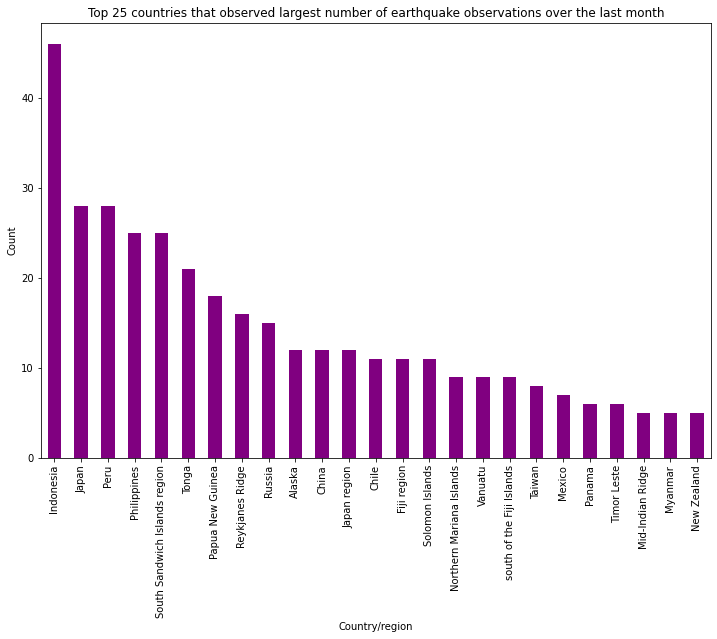

In [23]:
#Plotting the data grouped by country with most counts of earthquakes
groupby_countries.Magnitude.count().nlargest(25).plot(kind='bar', figsize=(12,8), color=['purple'])
plt.title("Top 25 countries that observed largest number of earthquake observations over the last month")
plt.ylabel("Count")

Looking at the graph, we can see that Indonesia has had the highest number of earthquakes over the last 1 month, followed by Japan, Peru, Philippines and so on. New Zealand ranks on number 25 in terms of most earthquakes observed in the last month.

###  Magnitudes observed across the countries

In [24]:
#Looking at the minimum, maximum and average magnitude for each country
max_min_magnitude = groupby_countries.Magnitude.aggregate([np.min, np.max, np.mean])
max_min_magnitude.columns = ['Min','Max','Mean']
max_min_magnitude.head(10)

,Min,Max,Mean
Country/region,,,
Afghanistan,4.9,4.9,4.900000
Afghanistan-Tajikistan border region,5.0,5.0,5.000000
Alaska,4.5,4.9,4.700000
Argentina,4.5,5.1,4.766667
Banda Sea,4.6,5.3,4.925000
Bolivia,5.1,5.1,5.100000
Carlsberg Ridge,4.5,4.5,4.500000
Chagos Archipelago region,4.7,4.7,4.700000
Chile,4.5,5.3,4.854545


In [25]:
#Looking at the countries with the highest average magnitudes
groupby_countries.Magnitude.mean().nlargest(10)

Country/region
North Pacific Ocean                        6.000000
Saint Helena                               5.800000
West Chile Rise                            5.800000
Pacific-Antarctic Ridge                    5.700000
east of the North Island of New Zealand    5.500000
southern Italy                             5.500000
off the coast of Central America           5.450000
central Mid-Atlantic Ridge                 5.266667
Greece                                     5.200000
north of Ascension Island                  5.200000
Name: Magnitude, dtype: float64

North Pacific ocean seems to have the highest average magnitude over the last month at a value of 6 on the Richter scale.

In [26]:
#Looking at the countries with the smallest magnitudes on average
groupby_countries.Magnitude.mean().nsmallest(10)

Country/region
Leeward Islands                   4.46
Carlsberg Ridge                   4.50
Costa Rica                        4.50
Federated States of Micronesia    4.50
Greenland Sea                     4.50
Guatemala                         4.50
Gulf of Mexico                    4.50
Iceland region                    4.50
India region                      4.50
Indian Ocean Triple Junction      4.50
Name: Magnitude, dtype: float64

Countries/regions with the smallest magnitude on average are Carlsberg Ridge, Costa Rica, Federated States of Micronesia, Greenland Sea, Guatemala, Gulf of Mexico, Iceland region, India region  and Indian Ocean Triple Junction observing earthquakes of magnitude 4.5 on the Richter scale over the last month.

<AxesSubplot:title={'center':'Top 15 Countries with highest average earthquake magnitude'}, xlabel='Country/region', ylabel='Magnitude'>

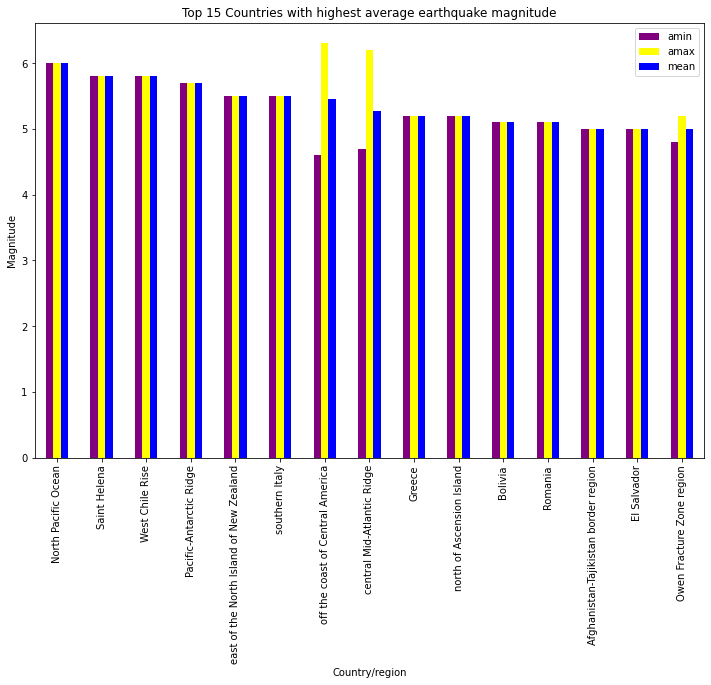

In [27]:
#Barplot for the top 10 countries in terms of average magnitude
barplot = groupby_countries.Magnitude.aggregate([np.min, np.max, np.mean]).nlargest(15, 'mean').plot(kind='bar', figsize=(12,8), color=['purple','yellow','blue'])
plt.title("Top 15 Countries with highest average earthquake magnitude")
plt.ylabel("Magnitude")
barplot

The graph precisely shows the countries ordered by the highest average magnitude. It also shows the minimum and maximum magnitudes for the top 15 countries (in terms of magnitude) that observed earthquakes during the last month.

Now I will be looking at the countries with the highest and the lowest absolute magnitude observed over the last month.

In [28]:
#Country with the highest magnitude observed over the last month
groupby_countries.Magnitude.max().nlargest(1)

Country/region
Panama    6.7
Name: Magnitude, dtype: float64

The output shows that during the last month, the country with the highest and possibly most damaging magnitude earthquake was Panama with a magnitude of 6.7 on Richter scale.

In [29]:
#Country with the smallest magnitude observed over the last month
groupby_countries.Magnitude.max().nsmallest(1)

Country/region
Leeward Islands    4.46
Name: Magnitude, dtype: float64

The smallest magnitude observed during the last month was 4.46 on Richter scale by Leeward Islands.

In [30]:
#Frequency of each magnitude level in the earthquake dataframe                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
freq = earthquake['Magnitude'].value_counts()
freq

4.50    119
4.60     88
4.90     64
4.70     53
4.80     40
5.00     26
5.10     21
5.20     21
5.30     12
5.40      9
5.50      7
5.80      4
6.40      2
6.30      2
6.00      1
6.10      1
5.90      1
4.58      1
5.60      1
4.66      1
4.46      1
6.70      1
6.20      1
5.70      1
Name: Magnitude, dtype: int64

Text(0, 0.5, 'Frequency')

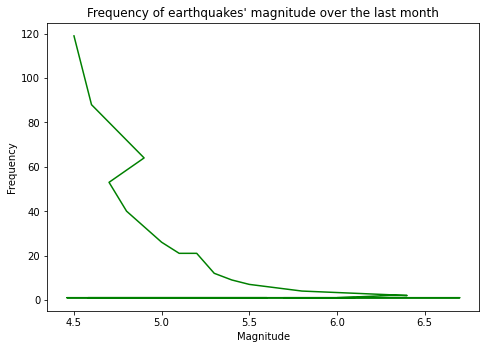

In [31]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])
ax.plot(freq, color='green')
plt.title("Frequency of earthquakes' magnitude over the last month")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")

The line graph easily helps us see the frequency of each magnitude observed. Most earthquakes had a magnitude of 4.5 at a frequency of 119 whereas, there were very few earthquakes with a magnitude greater than 6.

I also wanted to look at the earthquake activity across each day of the last month. 

### Analyzing the earthquake intensity observed on a per day scale during the last month across all the countries

I classified the earthquakes as 'Light', 'Moderate' and 'Strong'.

In [32]:
#Total counts of light, moderate and strong earthquakes during the last month
earthquake['Intensity'] = pd.cut(earthquake['Magnitude'], bins=[4.5, 4.9, 5.9, 6.9], include_lowest=True, labels=['Light', 'Moderate', 'Strong'])
earthquake['Intensity'].value_counts()

Light       366
Moderate    103
Strong        8
Name: Intensity, dtype: int64

During the last month there were 366 light, 103 moderate and 8 strong earthquakes across all the countries in our dataframe.

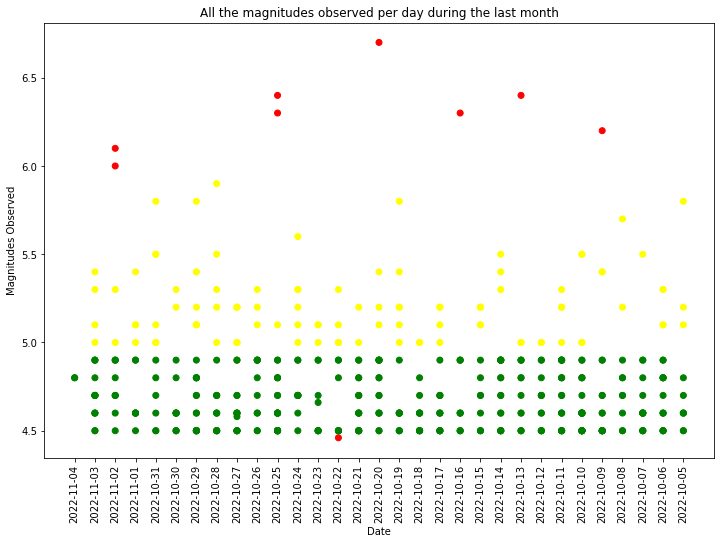

In [33]:
#Scatter plot of magnitudes observed over the last 30 days
x = earthquake['Date']
y = earthquake['Magnitude']
plt.figure(figsize=(12, 8))
plt.scatter(x, y, color=['green' if 4.5<=v<=4.9 else 'yellow' if 5<=v<=5.9 else 'red' for v in y])
plt.xticks(rotation = 90)
plt.xlabel("Date")
plt.ylabel("Magnitudes Observed")
plt.title("All the magnitudes observed per day during the last month")
plt.show()


I assigned different colors to different earthquake intensities in the scatterplot.

Magnitude 4.5-4.9 was assigned a green color indicating it was light.

Magnitude 5-5.9 was assigned a yellow color indicating it was moderate.

Magnitude > 6  was assigned a red color indicating it was strong.

This helps us easily distinguish earthquakes with different intensities.Looking at the scatter plot, we can see that majority of the earthquakes during the last 30 days were of light to moderate intensity with magnitude between 4.5 and 5.9. With a few strong earthquakes with a high magnitude of over 6.

### Depth Analysis

In [34]:
#Categorize earthquakes in terms of depth(km)
earthquake['Depth level'] = pd.cut(earthquake['Depth'], bins=[0, 70, 300, 700], include_lowest=True, labels=['Shallow', 'Intermediate', 'Deep'])
earthquake['Depth level'].value_counts()

Shallow         339
Intermediate    115
Deep             24
Name: Depth level, dtype: int64

As we can see in the output above, most of the earthquakes in the last month were shallow, shallow earthquakes tend to cause more damage than deep earthquakes so they can be considered a threat.

### Conclusions

The aim of my analysis was to look at the daily earthquake activity across the globe during the last month in order to get an idea of how frequently earthquakes are being observed, how strong these earthquakes are and how likely they are to cause damage.

My analysis shows that there were a total of 478 earthquake observations during the last month with magnitudes ranging from 4.5 to 6.9, these magnitudes are beleived to cause at least minor damage (for magnitude 4-4.9) as well as some serious damage (for magnitudes > 5). So we can consider this number of significant earthquakes to be concerning. 

My analysis also looked at the regions where the earthquakes were observed and as we can see in the list of the regions, most of the earthquakes were observed near coastal areas, the reason for this could be the movement of major tectonic plates in the region.

### Challenges

One challenge of using this earthquake catalog could be the fact that it provides spreadsheet data for last 30 days so in order to get yearly data, you would have to repeat the data collection step several times. However, it was not required for my analysis of interest.

### Future analysis

This data can also be used to run a regression analysis between depth and magnitude. Furthur if we collect data over a number of years, it can be used to do a time series analysis of the earthquake data.